# Here imported all important library, read the csv file

In [17]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.max_columns',None)
df=pd.read_csv('SampleSuperStore.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Here converted float to object because feature 'Postal Code' is to be good if that is in object format

In [2]:
convert={'Postal Code':'str'}
data=df.astype(convert)
df=data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null object
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


# Here checked weather null value present or not in the feature

In [3]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# For further catagorized the features,just look over on the all of feature

In [4]:
df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


# Here check the unique value present in each features

In [5]:
for feature in df.columns:
    print(feature,len(df[feature].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


# Here separated catagorical feature

In [6]:
catagorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
print(len(catagorical_feature))
catagorical_feature

9


['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Category',
 'Sub-Category']

# Here separated discrete feature

In [7]:
discrete_feature=[feature for feature in df.columns if df[feature].dtype!='O' and len(df[feature].unique())<30]
print(len(discrete_feature))
discrete_feature

2


['Quantity', 'Discount']

# Here separated continious feature

In [8]:
continious_feature=[feature for feature in df.columns if df[feature].dtypes!='O' and feature not in discrete_feature and 
                    feature not in catagorical_feature]
print(len(continious_feature))
continious_feature

2


['Sales', 'Profit']

# Here in this catplot you can see the top 10 most profit with respect to 'Ship Mode','Segment','Country','City','State','Postal Code','Region' ,'Category','Sub-Category'

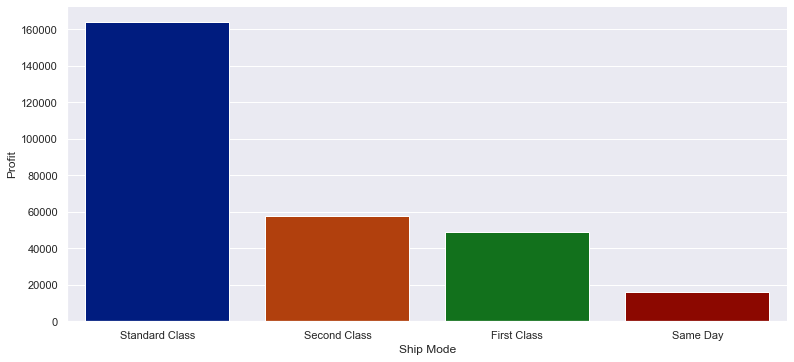

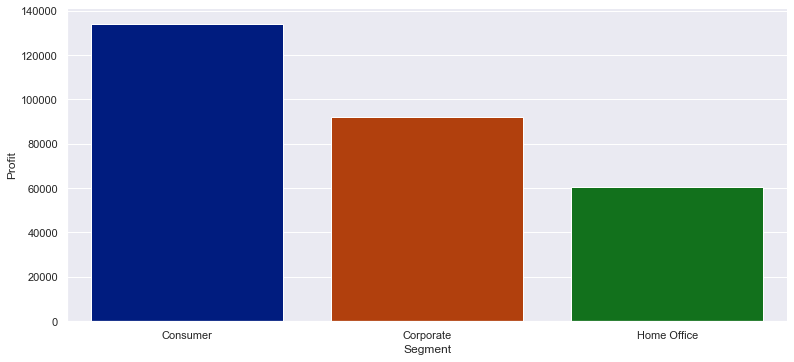

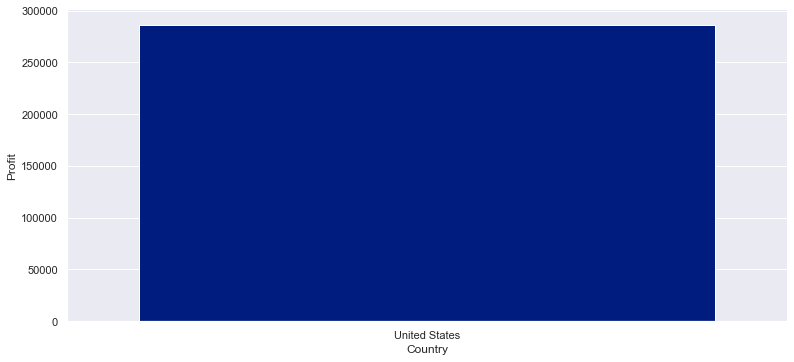

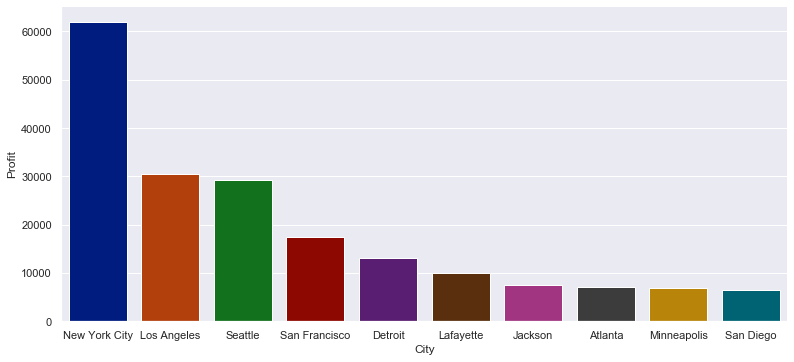

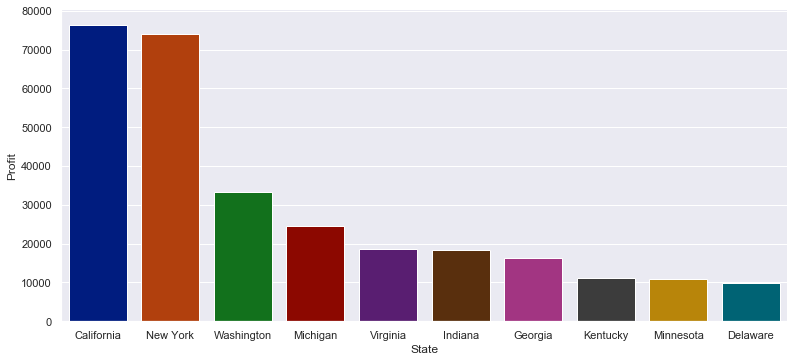

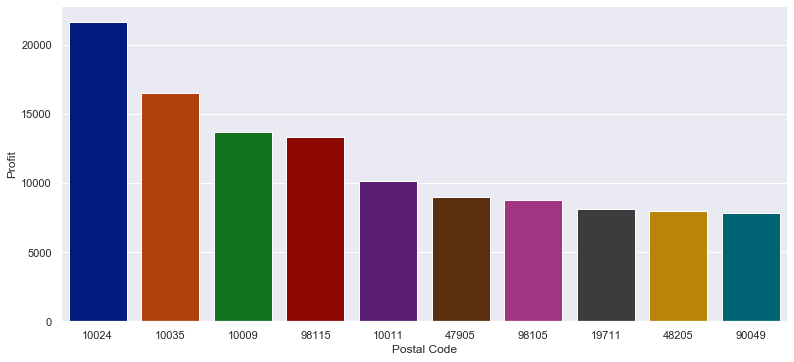

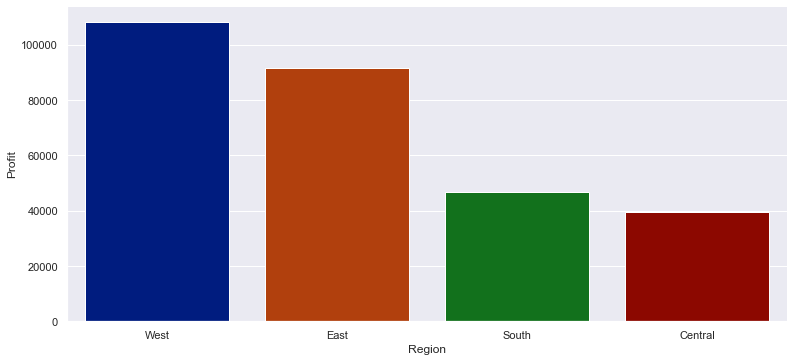

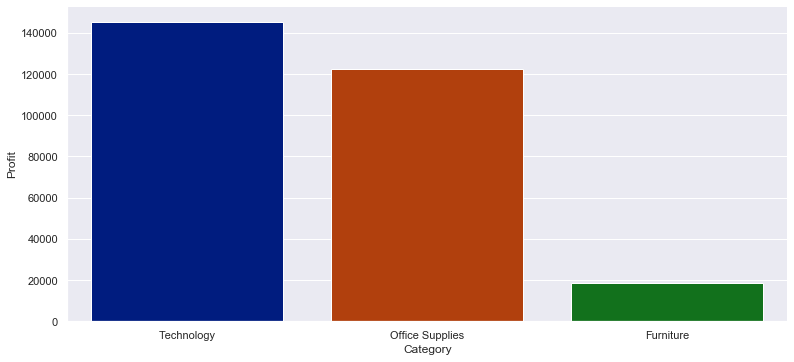

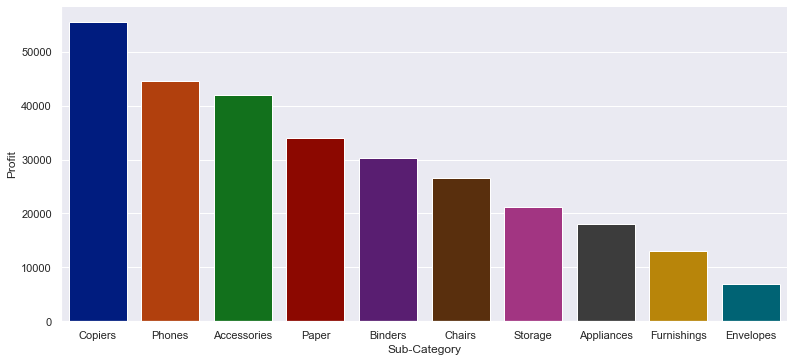

In [9]:
for feature in catagorical_feature:
    sns.set(style="darkgrid",palette='dark')
    top_10=pd.DataFrame(df.groupby(feature).sum()['Profit']).sort_values(by='Profit',ascending=False).head(10)
    sns.catplot(x=top_10.index,y="Profit",kind='bar',data=top_10,aspect=11/5,saturation=1.6)

# Here in this catplot you can see the top 10 most sale with respect to 'Ship Mode','Segment','Country','City','State','Postal Code','Region' ,'Category','Sub-Category'

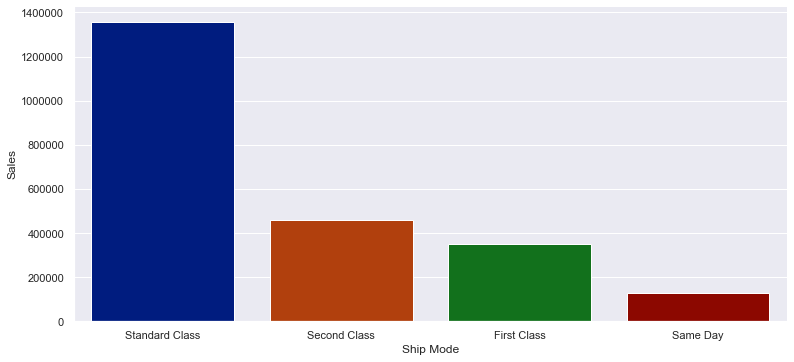

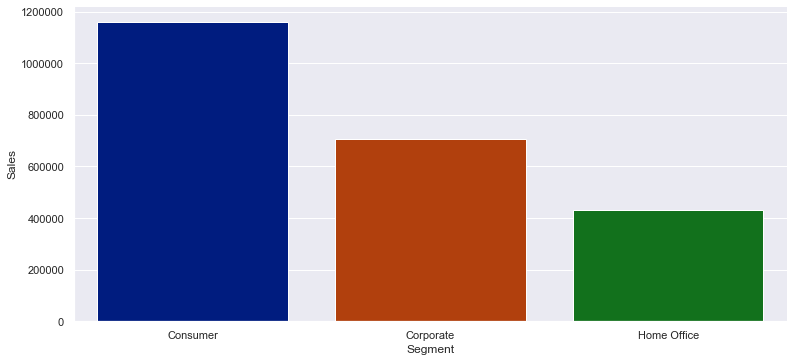

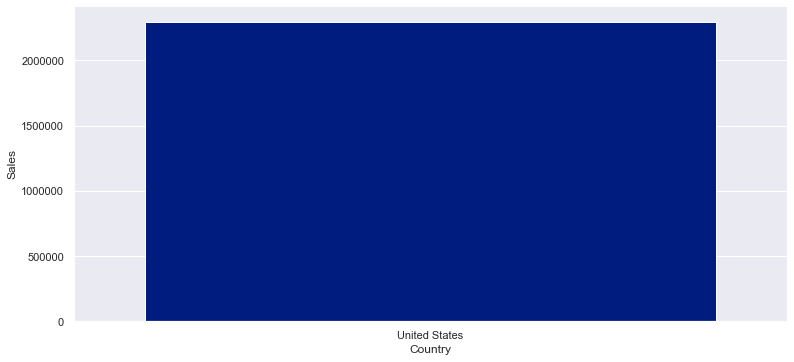

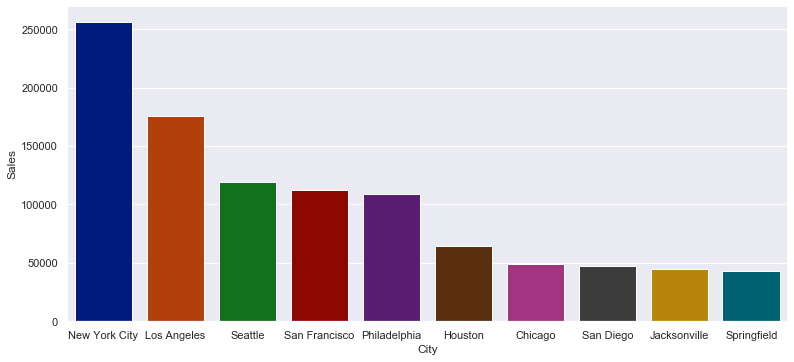

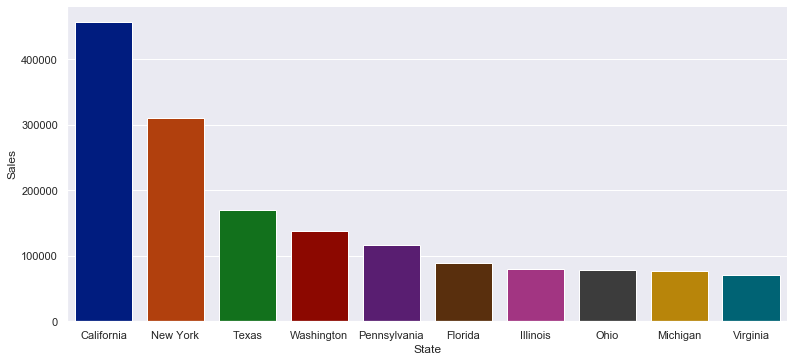

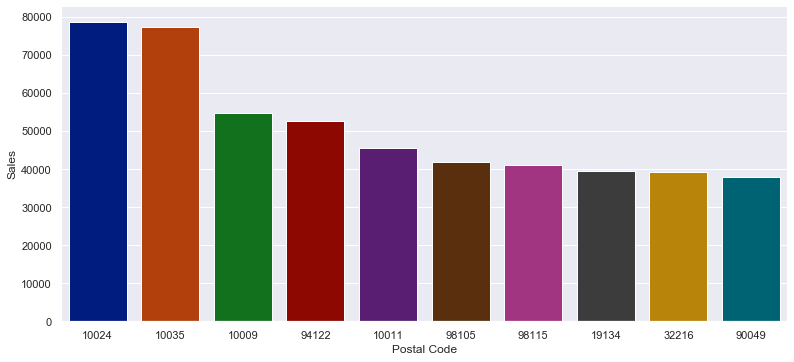

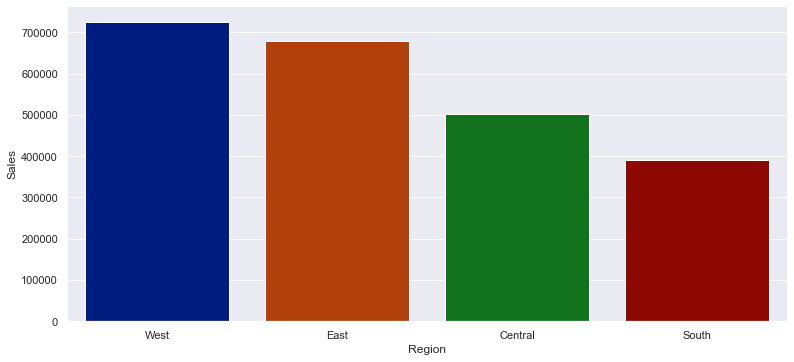

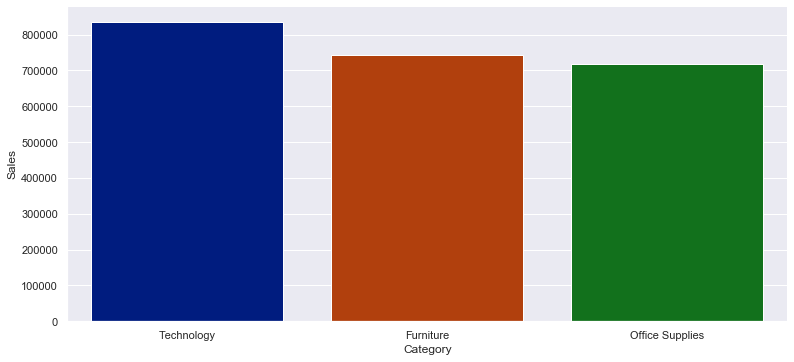

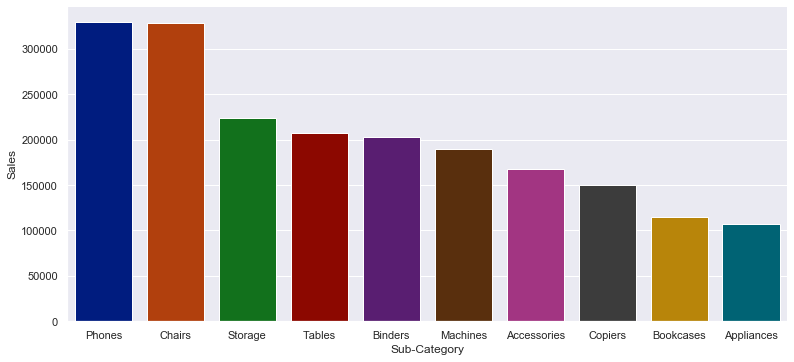

In [10]:
for feature in catagorical_feature:
    sns.set(style="darkgrid",palette='dark')
    top_10=pd.DataFrame(df.groupby(feature).sum()['Sales']).sort_values(by='Sales',ascending=False).head(10)
    sns.catplot(x=top_10.index,y="Sales",kind='bar',data=top_10,aspect=11/5,saturation=1.6)

# Here in this catplot you can see the most quantity sale with respect to 'Ship Mode','Segment','Country','City','State','Postal Code','Region' ,'Category','Sub-Category'

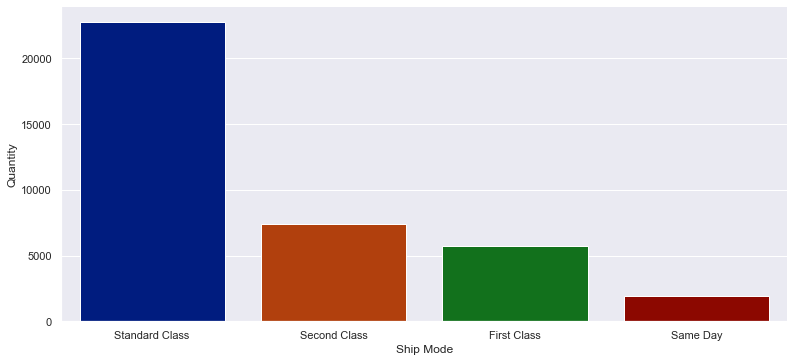

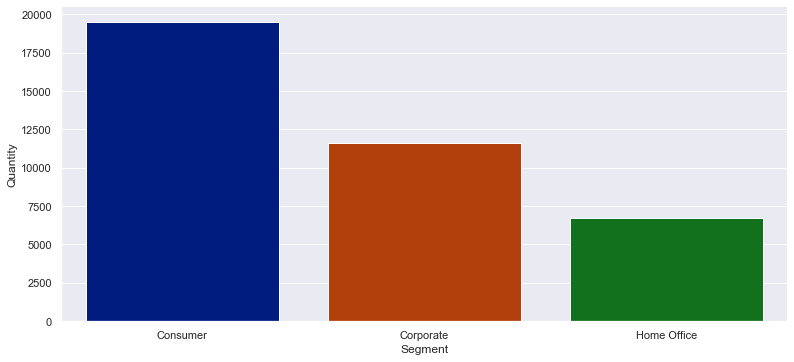

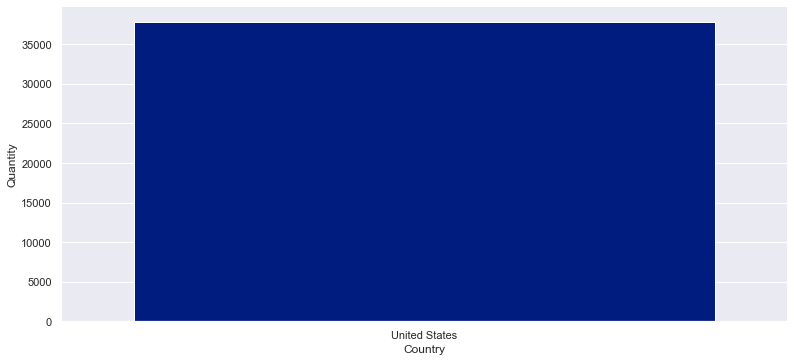

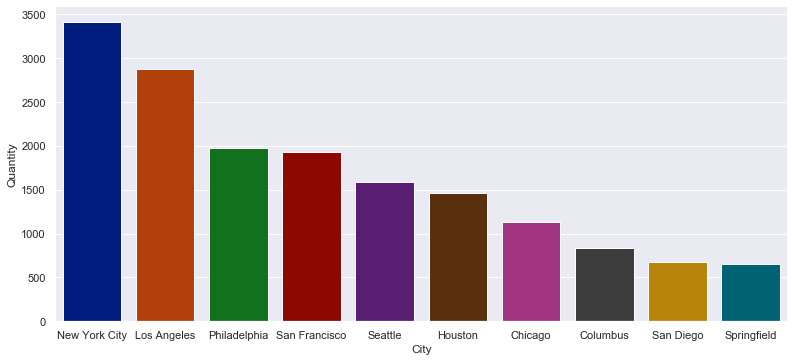

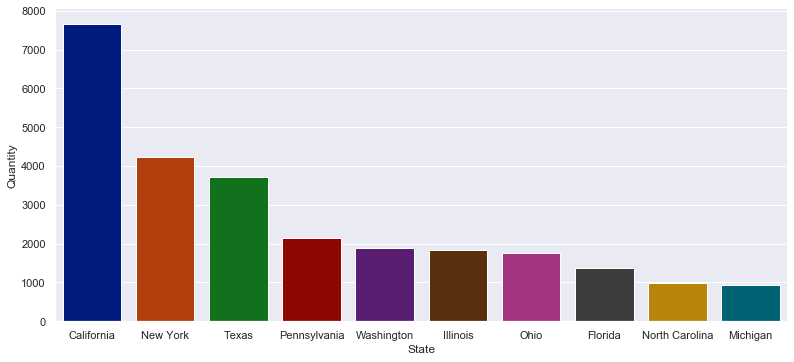

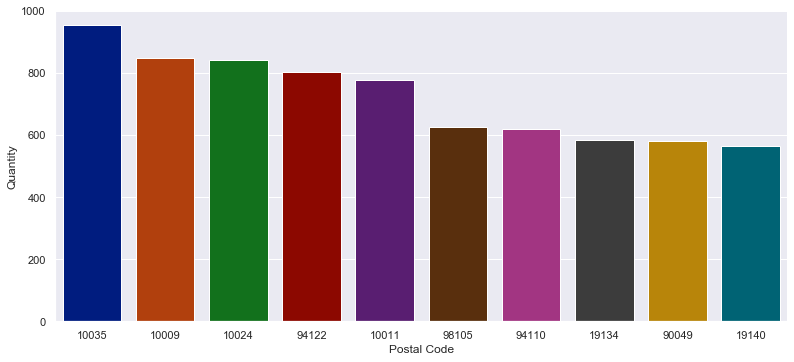

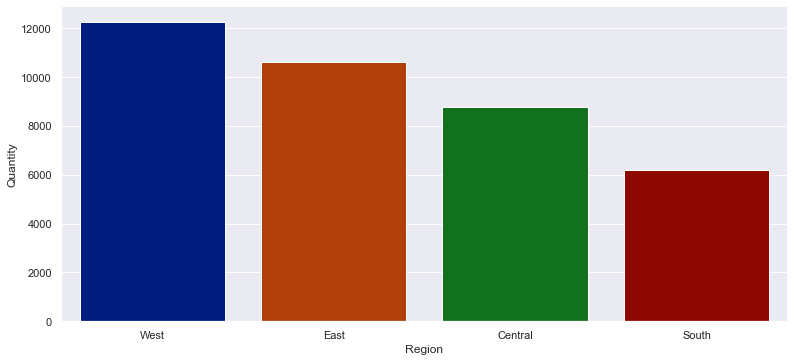

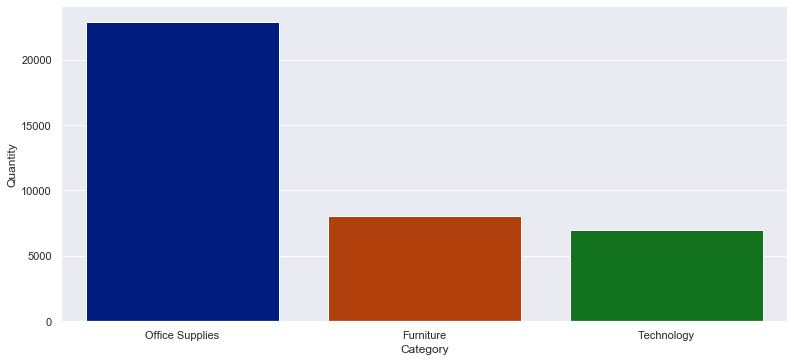

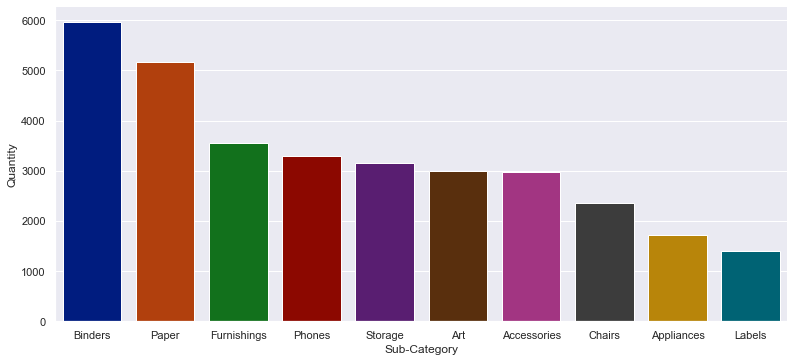

In [11]:
for feature in catagorical_feature:
    sns.set(style="darkgrid",palette='dark')
    top_10=pd.DataFrame(df.groupby(feature).sum()['Quantity'].sort_values(ascending=False)).head(10)
    sns.catplot(x=top_10.index,y="Quantity",kind='bar',data=top_10,aspect=11/5,saturation=1.6)

# Here in this catplot you can see the most discount count plot with respect to 'Ship Mode','Segment','Country','City','State','Postal Code','Region' ,'Category','Sub-Category'

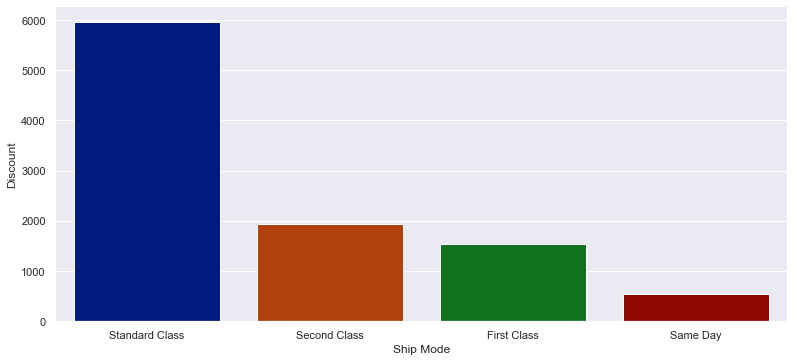

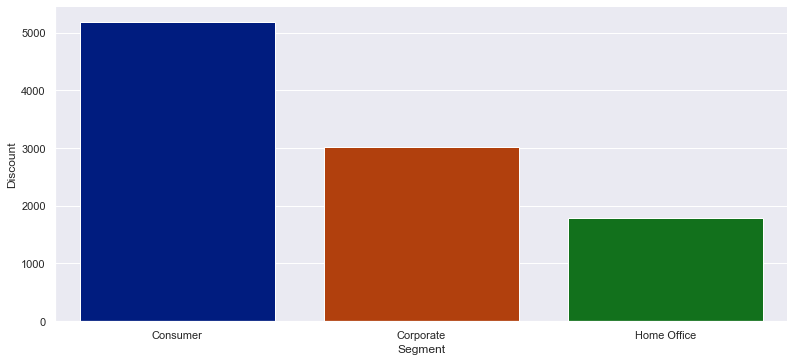

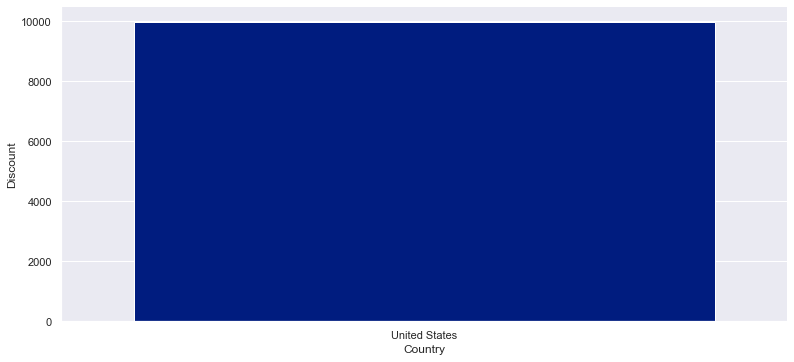

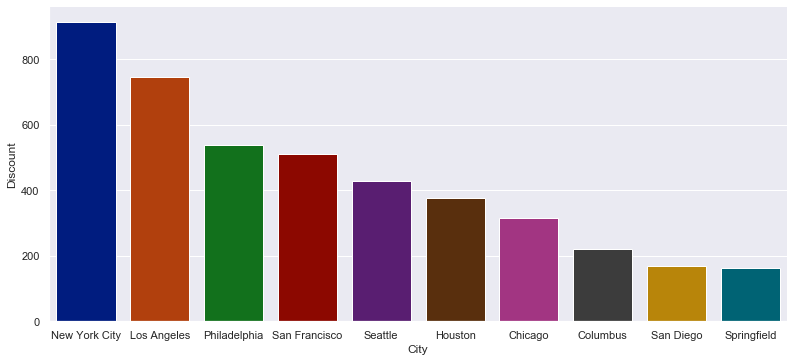

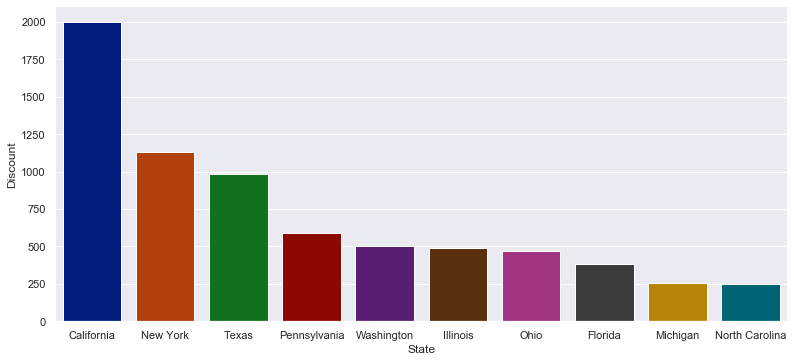

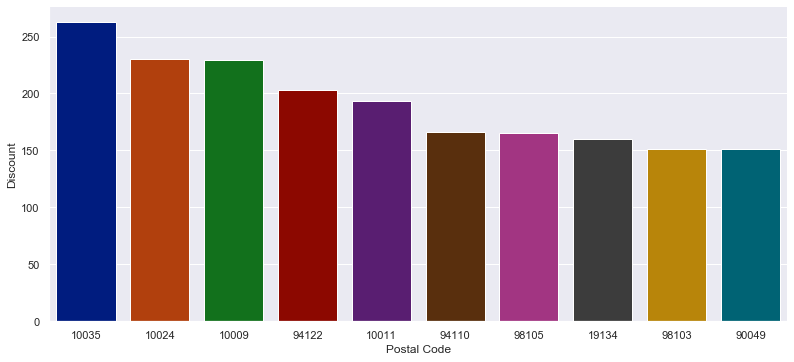

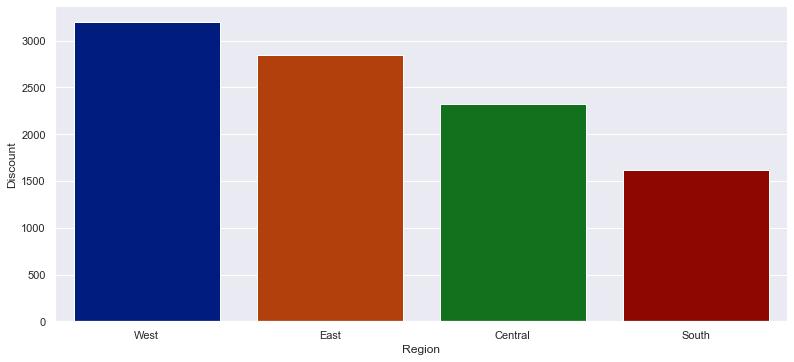

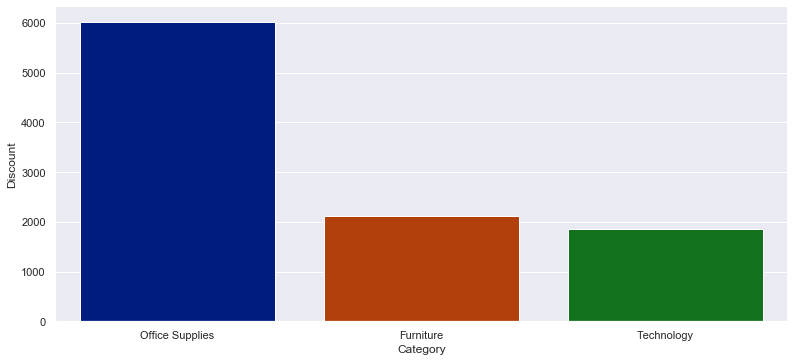

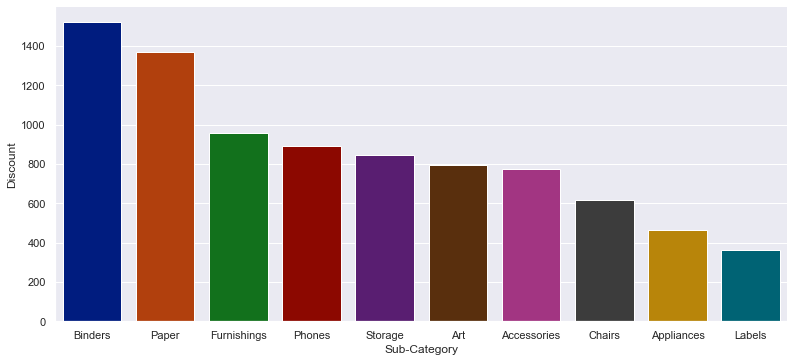

In [12]:
for feature in catagorical_feature:
    sns.set(style="darkgrid",palette='dark')
    top_10=pd.DataFrame(df.groupby(feature).count()['Discount'].sort_values(ascending=False)).head(10)
    sns.catplot(x=top_10.index,y="Discount",kind='bar',data=top_10,aspect=11/5,saturation=1.6)

# Top 10 city and state which got maximum loss to the company 

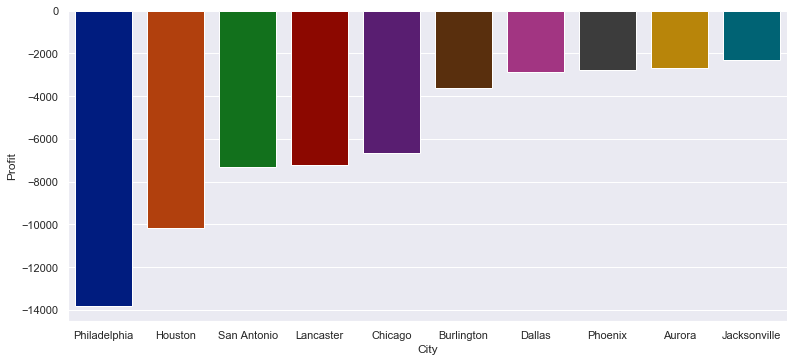

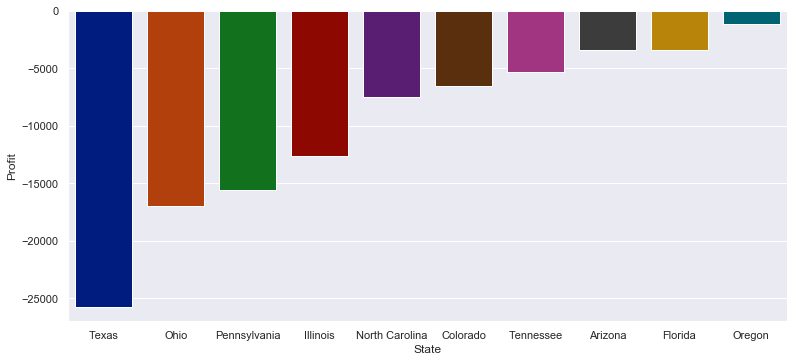

In [16]:
top_10_loss_city=pd.DataFrame(df.groupby('City').sum()['Profit'].sort_values(ascending=True).head(10))
sns.catplot(x=top_10_loss_city.index,y="Profit",kind='bar',aspect=11/5,saturation=1.6,data=top_10_loss_city)
top_10_loss_state=pd.DataFrame(df.groupby('State').sum()['Profit'].sort_values(ascending=True).head(10))
sns.catplot(x=top_10_loss_state.index,y="Profit",kind='bar',aspect=11/5,saturation=1.6,data=top_10_loss_state)